##### Les Membres Du Groupe (GL4):
Mehdi Ben Salha <br>
Zakaria Soussi <br>
Med Amine Bouchnak


In [120]:
%pip install keras

In [1]:

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import GRU
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import MaxPooling1D
from numpy import array
from numpy import asarray
from numpy import zeros


In [4]:
!wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2024-05-06 13:39:07--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M   311MB/s    in 0.2s    

2024-05-06 13:39:09 (311 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



In [123]:
import os
os.getcwd()

'/content'

In [5]:
movie_reviews=pd.read_csv('/content/IMDB-Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [125]:
movie_reviews.shape

(50000, 2)

In [126]:
movie_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

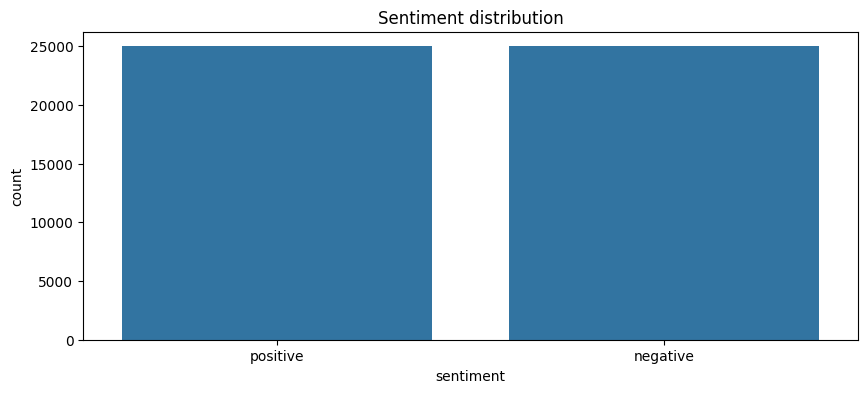

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.countplot(data=movie_reviews, x="sentiment")
plt.title("Sentiment distribution")
plt.show()

Le dataset est bien équilibré

In [128]:
movie_reviews.iloc[3,0]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

### Il y a des balises HTML

In [6]:
def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)
 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence


TAG_RE = re.compile(r'<[^>]+>')


def remove_tags(text):
 return TAG_RE.sub('', text)

ce code supprime les tags HTML , supprime les ponctuations et les nombres , supprime les mots qui se composent que d'une seule lettre et enleve les espaces multiples

In [7]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [131]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [8]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [133]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [134]:
from sklearn.model_selection import train_test_split

X_train_skip, X_test_skip, y_train_skip, y_test_skip = train_test_split(X, y,
test_size=0.20, random_state=42)

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)

In [136]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [137]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'is': 5,
 'it': 6,
 'in': 7,
 'this': 8,
 'that': 9,
 'was': 10,
 'as': 11,
 'movie': 12,
 'for': 13,
 'with': 14,
 'but': 15,
 'film': 16,
 'you': 17,
 'on': 18,
 'not': 19,
 'are': 20,
 'he': 21,
 'his': 22,
 'have': 23,
 'one': 24,
 'be': 25,
 'all': 26,
 'at': 27,
 'they': 28,
 'by': 29,
 'an': 30,
 'who': 31,
 'so': 32,
 'from': 33,
 'like': 34,
 'there': 35,
 'or': 36,
 'just': 37,
 'her': 38,
 'out': 39,
 'about': 40,
 'if': 41,
 'has': 42,
 'what': 43,
 'some': 44,
 'good': 45,
 'can': 46,
 'more': 47,
 'very': 48,
 'when': 49,
 'she': 50,
 'up': 51,
 'no': 52,
 'time': 53,
 'my': 54,
 'even': 55,
 'would': 56,
 'which': 57,
 'story': 58,
 'only': 59,
 'really': 60,
 'see': 61,
 'their': 62,
 'had': 63,
 'me': 64,
 'well': 65,
 'we': 66,
 'were': 67,
 'than': 68,
 'much': 69,
 'bad': 70,
 'been': 71,
 'get': 72,
 'do': 73,
 'people': 74,
 'great': 75,
 'other': 76,
 'also': 77,
 'will': 78,
 'into': 79,
 'how': 80,
 'because': 81,
 'do

In [138]:
len(tokenizer.word_index)

92546

In [139]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [140]:
vocab_size

92547

In [141]:
X_train[0]

array([   4,    1,  296,  140, 2854,    2,  405,  614,    1,  263,    5,
       3514,  977,    4,   25,   37,   11, 1237,  215,   62,    2,   35,
          5,   27,  217,   24,  189, 1430,    7, 1068,   15, 4868,   81,
          1,  221,   63,  351,   64,   52,   24,    4, 3547,   13,    6,
         19,  192,    4,  859, 3430, 1720,   17,   23,    4,  158,  194,
        175,  106,    9, 1604,  461,   71,  218,    4,  321,    2, 3431,
         31,   20,   47,   68, 1844, 4668,   11,    6, 1365,    8,   16,
          5, 3475, 1990,   14,   59,    1, 2380,  460,  518,    2,  170,
       2524, 2698, 1745,    4,  573,    6,   33,    1, 3750,  198,  345,
       3812], dtype=int32)

In [142]:
X_train[0].shape

(100,)

In [143]:
!wget https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz

--2024-05-06 12:58:18--  https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz [following]
--2024-05-06 12:58:18--  https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134409071 (128M) [application/octet-stream]
Saving to: ‘glove.6B.100d.txt.gz’

glove.6B.100d.txt.g 100%[===================>] 128.18M   192MB/s    in 0.7s    

2024-05-06 12:58:21 (192 MB/s) - ‘glove.6B.100d.txt.gz’ saved 

In [144]:
!ls /content

 glove.6B.100d.txt     'glove.6B.100d.txt.gz?download='   IMDB-Dataset.csv.1   wiki.en.vec
 glove.6B.100d.txt.gz   IMDB-Dataset.csv		  sample_data


In [145]:
!gzip "/content/glove.6B.100d.txt.gz" -d "/content/"


gzip: /content/glove.6B.100d.txt already exists; do you wish to overwrite (y or n)? ^C


In [163]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary_glove = dict()
glove_file = open("/content/glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:],dtype='float32')
  embeddings_dictionary_glove[word] = vector_dimensions
glove_file.close()


In [164]:
embeddings_dictionary_glove


{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [165]:
len(embeddings_dictionary_glove),type(embeddings_dictionary_glove)


(400000, dict)

In [166]:
embedding_matrix_glove = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary_glove.get(word)
  if embedding_vector is not None:
    embedding_matrix_glove[index] = embedding_vector

In [167]:
embedding_matrix_glove.shape

(92547, 100)

In [168]:
type(embedding_matrix_glove)

numpy.ndarray

In [169]:
embedding_matrix_glove

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37771001,  0.22946   , -0.30311   , ..., -0.33610001,
         0.02637   , -0.72302002],
       [ 0.99882001,  0.044     ,  0.58508003, ..., -0.54869002,
         0.15141   ,  1.36880004]])

### Classification avec un simple réseau de neurones

In [170]:

model=Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix_glove],input_length=maxlen , trainable=False))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))




In [171]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 9264701 (35.34 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [172]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [173]:
history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 6s 6ms/step - loss: 0.6037 - accuracy: 0.6722 - val_loss: 0.5354 - val_accuracy: 0.7349
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4983 - accuracy: 0.7595 - val_loss: 0.5243 - val_accuracy: 0.7369
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4602 - accuracy: 0.7837 - val_loss: 0.5303 - val_accuracy: 0.7420
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4375 - accuracy: 0.7978 - val_loss: 0.5422 - val_accuracy: 0.7366
Epoch 5/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.8079 - val_loss: 0.5252 - val_accuracy: 0.7483
Epoch 6/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4150 - accuracy: 0.8101 - val_loss: 0.5475 - val_accuracy: 0.7421


In [174]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.5513 - accuracy: 0.7363
Test Score: 0.5512996315956116
Test Accuracy: 0.736299991607666


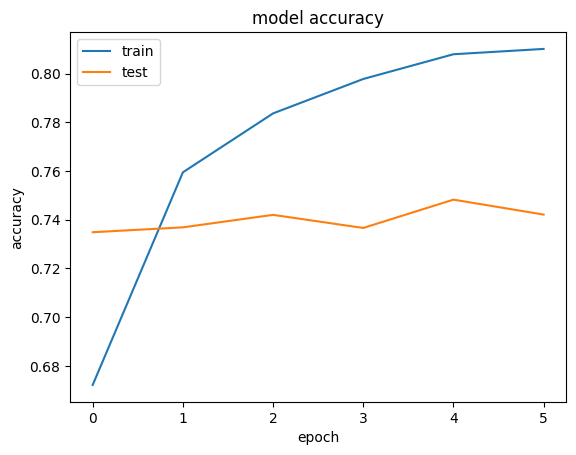

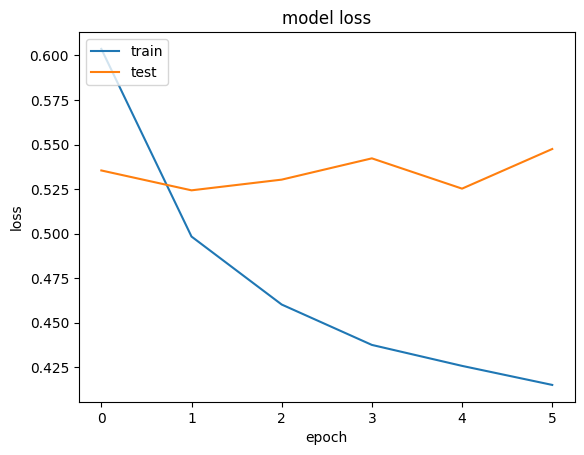

In [175]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


## Classification avec un réseau de neurones convolutionnel

In [176]:
model_2=Sequential()
model_2.add(Embedding(vocab_size, 100, weights=[embedding_matrix_glove],input_length=maxlen , trainable=False))
model_2.add(Conv1D(128,5,activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(1,activation='sigmoid'))

In [177]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          9254700   
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9318957 (35.55 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [178]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [179]:
history_2=model_2.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 6s 8ms/step - loss: 0.4925 - accuracy: 0.7563 - val_loss: 0.4459 - val_accuracy: 0.7859
Epoch 2/6
250/250 [==============================] - 2s 7ms/step - loss: 0.3692 - accuracy: 0.8368 - val_loss: 0.3636 - val_accuracy: 0.8394
Epoch 3/6
250/250 [==============================] - 2s 7ms/step - loss: 0.3196 - accuracy: 0.8656 - val_loss: 0.3601 - val_accuracy: 0.8378
Epoch 4/6
250/250 [==============================] - 1s 6ms/step - loss: 0.2781 - accuracy: 0.8873 - val_loss: 0.3458 - val_accuracy: 0.8457
Epoch 5/6
250/250 [==============================] - 2s 7ms/step - loss: 0.2423 - accuracy: 0.9078 - val_loss: 0.3603 - val_accuracy: 0.8395
Epoch 6/6
250/250 [==============================] - 2s 6ms/step - loss: 0.2169 - accuracy: 0.9207 - val_loss: 0.3494 - val_accuracy: 0.8451


In [180]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score_2[0])
print("Test Accuracy:", score_2[1])

Test Score: 0.34446316957473755
Test Accuracy: 0.8464999794960022


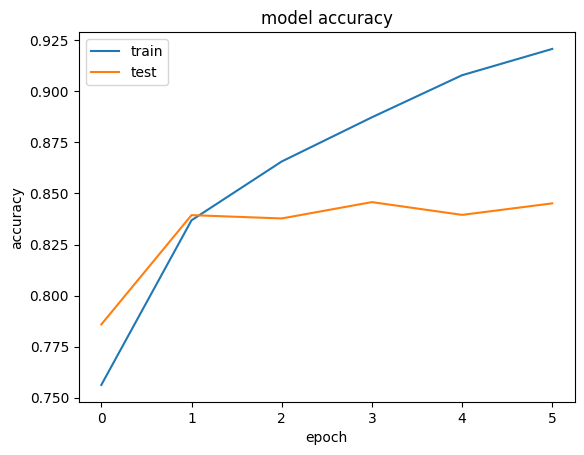

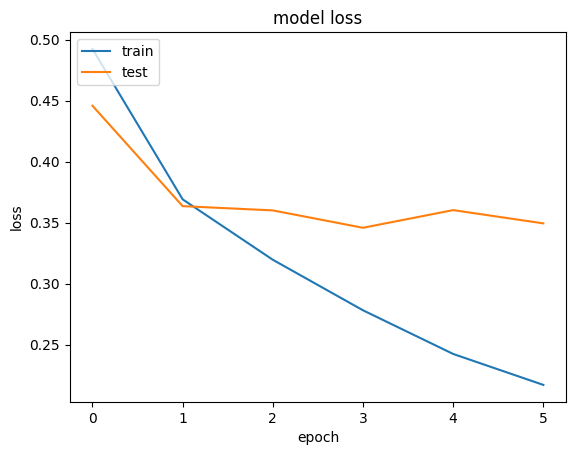

In [181]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Classification avec un réseau de neurones récurrent (LSTM)

In [182]:
model_3=Sequential()
model_3.add(Embedding(vocab_size, 100, weights=[embedding_matrix_glove],input_length=maxlen , trainable=False))
model_3.add(LSTM(128))
model_3.add(Dense(1,activation='sigmoid'))

In [183]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          9254700   
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9372077 (35.75 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [184]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [185]:
history_3=model_3.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 7s 16ms/step - loss: 0.5609 - accuracy: 0.7069 - val_loss: 0.4553 - val_accuracy: 0.7896
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4575 - accuracy: 0.7880 - val_loss: 0.4146 - val_accuracy: 0.8073
Epoch 3/6
250/250 [==============================] - 3s 11ms/step - loss: 0.4072 - accuracy: 0.8137 - val_loss: 0.3742 - val_accuracy: 0.8351
Epoch 4/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3641 - accuracy: 0.8385 - val_loss: 0.3496 - val_accuracy: 0.8455
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3379 - accuracy: 0.8516 - val_loss: 0.3395 - val_accuracy: 0.8504
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3272 - accuracy: 0.8562 - val_loss: 0.3313 - val_accuracy: 0.8583


In [186]:
score_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score_3[0])
print("Test Accuracy:", score_3[1])

Test Score: 0.329373836517334
Test Accuracy: 0.8571000099182129


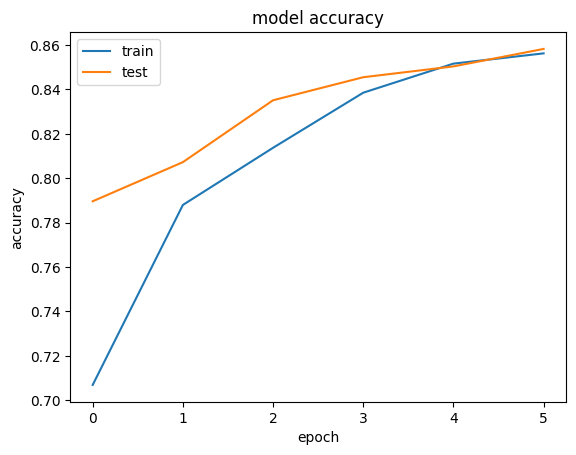

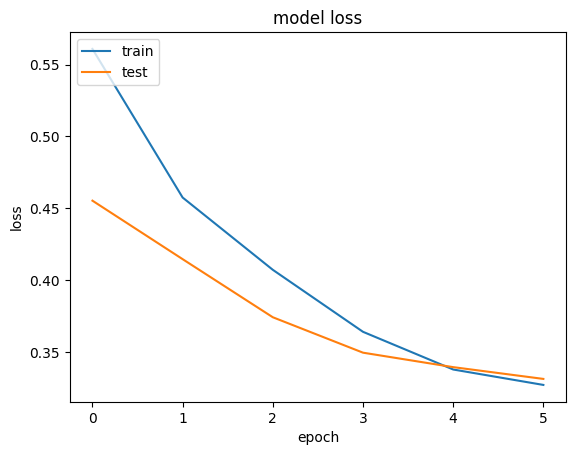

In [187]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**3)Comparer les résultats des 3 classifieurs**<br>
Les résultats montrent une précision de 0.84 pour les modèles LSTM et CNN, tandis que le premier modèle affiche une précision de 0.73. Cette observation souligne l'importance des couches spécialisées telles que LSTM, CONVOLUTION, GRU, etc. Les modèles simples utilisant uniquement des couches Dense présentent en effet des valeurs de précision plus faibles.

**4)Choisir une instance aléatoirement et donner sa polarité.**

In [188]:
X_train_skip[2]

'A touching love story reminiscent of In the Mood for Love Drawing heavily on Chinese poetry and how this is used by eastern people to communicate feelings to each other the story focuses on schoolteacher who wants so much to be model teacher as well as good husband and father senior student is very attracted to him As the story unfolds we see the emotions below the surface in his year marriage and how he grapples with the moral dilemmas that face him beautiful and moving story '

In [189]:
y_train[2]

1

In [190]:
round(model_3.predict(X_train[2,:].reshape(100,1)).sum()/100)

4/4 [==============================] - 1s 4ms/step


1

In [191]:
X_train_skip[1]

'I did not watch the entire movie could not watch the entire movie stopped the DVD after watching for half an hour and suggest anyone thinking of watching themselves it stop themselves before taking the disc out of the case like Mafia movies both tragic and comic but Corky Romano can only be described as tragic attempt at mafia comedy The problem is Corky Romano simply tries too hard to get the audience to laugh the plot seems to be an excuse for moving Chris Kattan Corky from one scene to another Corky himself is completely overplayed and lacks subtlety or credulity all his strange mannerisms come across as contrived Chris Kattan is clearly acting rather than taking role it bounces you right out of the story Each scene is utterly predictable the comedic event that will occur on the set is obvious as soon as each scene is introduced In comedies such as Mr Bean the disasters caused by the title character are funny because you can empathise with the characters motivations and initial eve

In [192]:
y_train[1]

0

In [193]:
round(model_3.predict(X_train[1,:].reshape(100,1)).sum()/100)

4/4 [==============================] - 0s 4ms/step


0

In [15]:
def evaluate(model):
  score = model.evaluate(X_test, y_test, verbose=0)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])

In [16]:
def plot(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

In [236]:

def lstm(matrix,out):
  model=Sequential()
  model.add(Embedding(vocab_size, out, weights=[matrix],input_length=maxlen , trainable=False))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  return model,history

In [237]:
def gru(matrix,out):
  model=Sequential()
  model.add(Embedding(vocab_size, out, weights=[matrix],input_length=maxlen , trainable=False))
  model.add(GRU(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  return model,history

In [238]:
from keras.layers import MaxPooling1D
def cnn_lstm(matrix,out):
  model=Sequential()
  model.add(Embedding(vocab_size, out, weights=[matrix],input_length=maxlen , trainable=False))
  model.add(Conv1D(128,5,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)


  return model,history




### GRU MODEL

In [204]:
gru_model,gru_hist=gru(embedding_matrix_glove,100)

Epoch 1/6
250/250 [==============================] - 15s 17ms/step - loss: 0.5138 - accuracy: 0.7347 - val_loss: 0.4134 - val_accuracy: 0.8105
Epoch 2/6
250/250 [==============================] - 5s 20ms/step - loss: 0.3947 - accuracy: 0.8203 - val_loss: 0.4368 - val_accuracy: 0.7855
Epoch 3/6
250/250 [==============================] - 5s 21ms/step - loss: 0.3601 - accuracy: 0.8369 - val_loss: 0.3419 - val_accuracy: 0.8464
Epoch 4/6
250/250 [==============================] - 4s 17ms/step - loss: 0.3371 - accuracy: 0.8502 - val_loss: 0.3587 - val_accuracy: 0.8400
Epoch 5/6
250/250 [==============================] - 4s 18ms/step - loss: 0.3156 - accuracy: 0.8616 - val_loss: 0.3301 - val_accuracy: 0.8524
Epoch 6/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2964 - accuracy: 0.8724 - val_loss: 0.3222 - val_accuracy: 0.8577


In [205]:
evaluate(gru_model)

Test Score: 0.31483250856399536
Test Accuracy: 0.8611000180244446


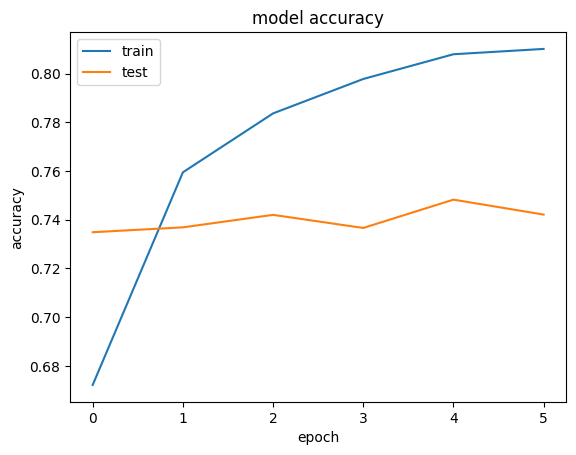

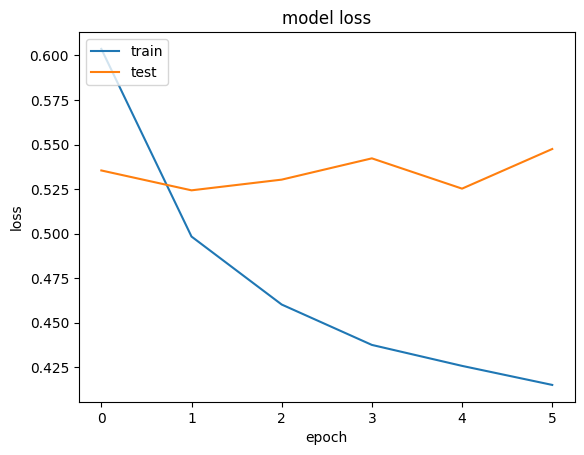

In [206]:
plot(history)

CNN+LSTM MODEL

In [207]:
cnn_lstm_model,cnn_lstm_hist=cnn_lstm(embedding_matrix_glove,100)


Epoch 1/6
250/250 [==============================] - 11s 15ms/step - loss: 0.5350 - accuracy: 0.7235 - val_loss: 0.4342 - val_accuracy: 0.8030
Epoch 2/6
250/250 [==============================] - 2s 10ms/step - loss: 0.4016 - accuracy: 0.8173 - val_loss: 0.3918 - val_accuracy: 0.8204
Epoch 3/6
250/250 [==============================] - 2s 10ms/step - loss: 0.3589 - accuracy: 0.8428 - val_loss: 0.3956 - val_accuracy: 0.8213
Epoch 4/6
250/250 [==============================] - 2s 10ms/step - loss: 0.3145 - accuracy: 0.8660 - val_loss: 0.3502 - val_accuracy: 0.8485
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2762 - accuracy: 0.8849 - val_loss: 0.3591 - val_accuracy: 0.8469
Epoch 6/6
250/250 [==============================] - 2s 10ms/step - loss: 0.2415 - accuracy: 0.9018 - val_loss: 0.3695 - val_accuracy: 0.8397


In [208]:
evaluate(cnn_lstm_model)

Test Score: 0.3742639422416687
Test Accuracy: 0.8341000080108643


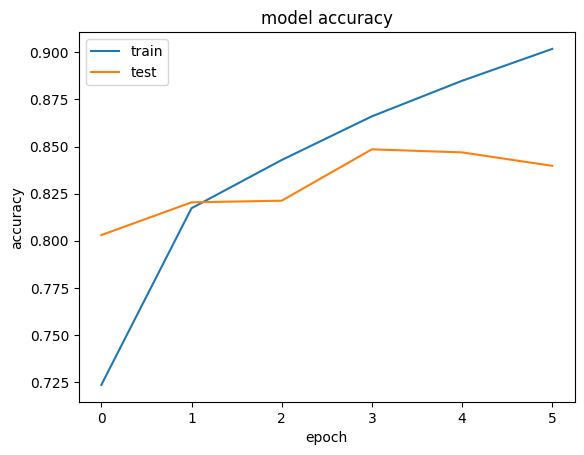

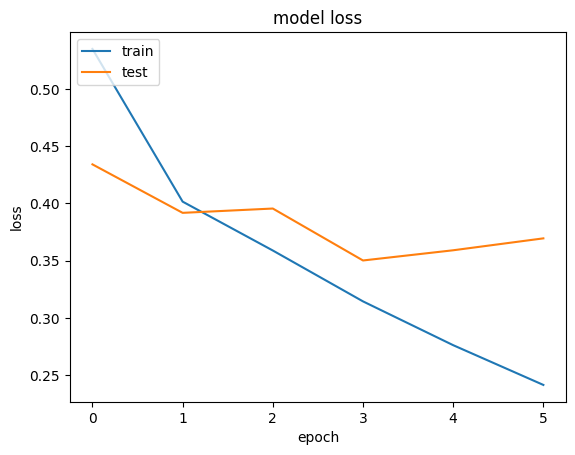

In [209]:
plot(cnn_lstm_hist)

#FASTTEXT EMBEDDINGS#

In [ ]:
#!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

In [210]:
from tqdm import tqdm
import os, re, csv, math, codecs
print('loading word embeddings...')
embeddings_dictionary_fasttext = {}
f = codecs.open('wiki.en.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary_fasttext[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_dictionary_fasttext))

loading word embeddings...


2519428it [07:23, 5683.25it/s]


found 2519396 word vectors


In [211]:
embedding_matrix_fasttext = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary_fasttext.get(word)
    if embedding_vector is not None:
        if embedding_vector.shape==(0,):
          continue
        embedding_matrix_fasttext[index] = embedding_vector


In [213]:
embedding_matrix_fasttext.shape

(92547, 300)

LSTM MODEL

In [214]:
lstm,lstmhist=lstm(embedding_matrix_fasttext,300)

Epoch 1/6
250/250 [==============================] - 18s 27ms/step - loss: 0.4940 - accuracy: 0.7583 - val_loss: 0.4663 - val_accuracy: 0.7974
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4092 - accuracy: 0.8131 - val_loss: 0.4135 - val_accuracy: 0.8159
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3894 - accuracy: 0.8261 - val_loss: 0.3935 - val_accuracy: 0.8223
Epoch 4/6
250/250 [==============================] - 3s 14ms/step - loss: 0.3581 - accuracy: 0.8421 - val_loss: 0.3439 - val_accuracy: 0.8515
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3346 - accuracy: 0.8568 - val_loss: 0.3527 - val_accuracy: 0.8453
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3132 - accuracy: 0.8658 - val_loss: 0.3259 - val_accuracy: 0.8616


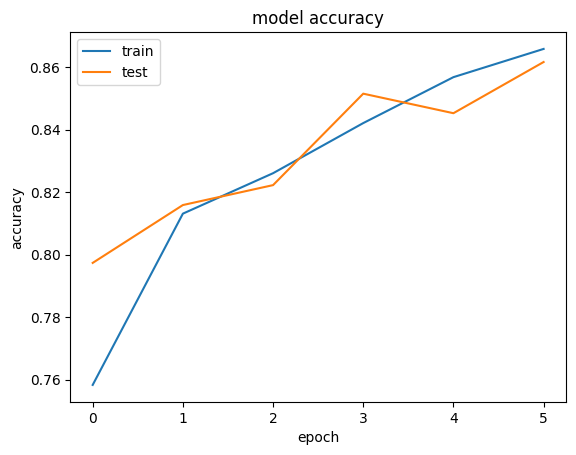

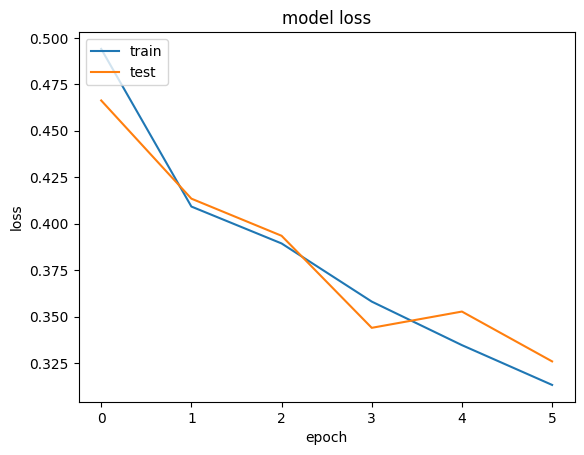

In [216]:
plot(lstmhist)

In [217]:
evaluate(lstm)

Test Score: 0.32085007429122925
Test Accuracy: 0.859499990940094


GRU MODEL

In [219]:
gru_model,gru_history=gru(embedding_matrix_fasttext,300)

Epoch 1/6
250/250 [==============================] - 11s 19ms/step - loss: 0.5633 - accuracy: 0.6982 - val_loss: 0.3990 - val_accuracy: 0.8204
Epoch 2/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3789 - accuracy: 0.8299 - val_loss: 0.3534 - val_accuracy: 0.8468
Epoch 3/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3449 - accuracy: 0.8473 - val_loss: 0.3412 - val_accuracy: 0.8485
Epoch 4/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3208 - accuracy: 0.8608 - val_loss: 0.3179 - val_accuracy: 0.8600
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3075 - accuracy: 0.8668 - val_loss: 0.3302 - val_accuracy: 0.8565
Epoch 6/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2916 - accuracy: 0.8771 - val_loss: 0.3087 - val_accuracy: 0.8681


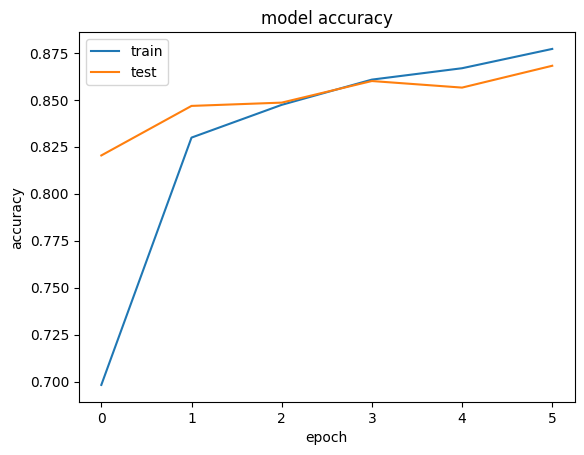

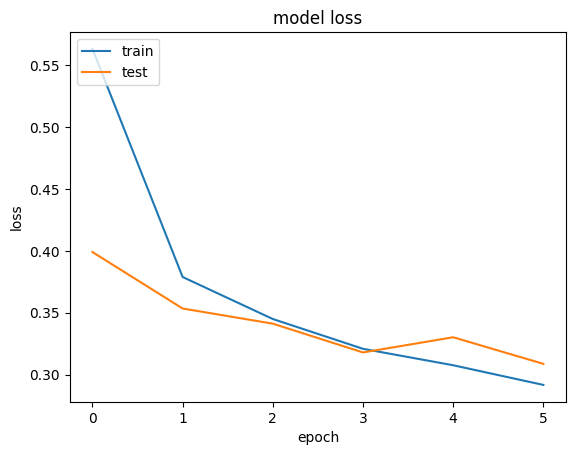

In [221]:
plot(gru_history)

In [222]:
evaluate(gru_model)

Test Score: 0.3009747862815857
Test Accuracy: 0.8684999942779541


CNN+LSTM MODEL

In [220]:
cnn_lstm_model,cnn_lstm_history=cnn_lstm(embedding_matrix_fasttext,300)

Epoch 1/6
250/250 [==============================] - 8s 15ms/step - loss: 0.5105 - accuracy: 0.7439 - val_loss: 0.3652 - val_accuracy: 0.8365
Epoch 2/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3542 - accuracy: 0.8453 - val_loss: 0.3445 - val_accuracy: 0.8533
Epoch 3/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3075 - accuracy: 0.8704 - val_loss: 0.4247 - val_accuracy: 0.7966
Epoch 4/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2642 - accuracy: 0.8915 - val_loss: 0.3282 - val_accuracy: 0.8622
Epoch 5/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2153 - accuracy: 0.9158 - val_loss: 0.3572 - val_accuracy: 0.8482
Epoch 6/6
250/250 [==============================] - 3s 11ms/step - loss: 0.1696 - accuracy: 0.9348 - val_loss: 0.4429 - val_accuracy: 0.8379


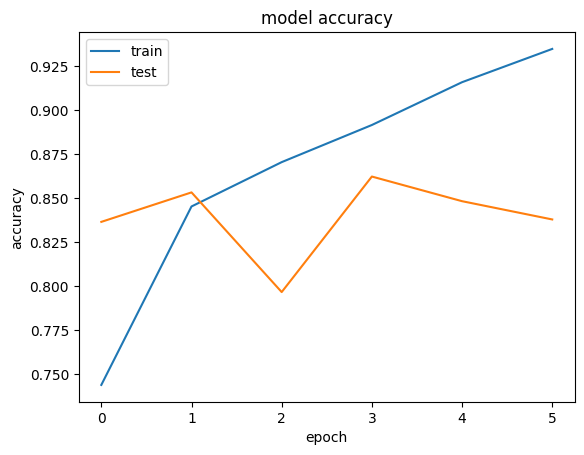

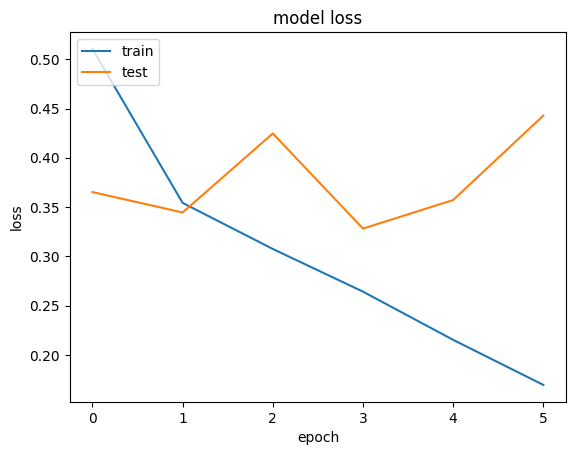

In [223]:
plot(cnn_lstm_history)


In [224]:
evaluate(cnn_lstm_model)

Test Score: 0.4274367094039917
Test Accuracy: 0.840399980545044


#WORD2VEC EMBEDDINGS#


In [225]:
!wget https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz


--2024-05-06 13:24:45--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M   216MB/s    in 1.2s    

2024-05-06 13:24:52 (216 MB/s) - ‘GoogleNews-vectors-negative300-SLIM.bin.gz’ saved [276467217/276467217]



In [226]:
!gunzip /content/GoogleNews-vectors-negative300-SLIM.bin.gz


In [228]:
from gensim.models.keyedvectors import KeyedVectors
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
print('loading word2vec model…')
word2vec_model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300-SLIM.bin', binary=True)
def getVector(str):
  if str in word2vec_model:
    return word2vec_model[str]
  else:
    return None;
def isInModel(str):
  return str in word2vec_model

loading word2vec model…


In [229]:
# create a weight matrix for words in training docs
embedding_matrix_w2v = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vector = getVector(word)
  if embedding_vector is not None:
    embedding_matrix_w2v[i] = embedding_vector

In [234]:
(embedding_matrix_w2v).shape

(92547, 300)

LSTM MODEL

In [239]:
lstm_model,lstm_history=lstm(embedding_matrix_w2v,300)

Epoch 1/6
250/250 [==============================] - 12s 18ms/step - loss: 0.5128 - accuracy: 0.7463 - val_loss: 0.4171 - val_accuracy: 0.8116
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4232 - accuracy: 0.8090 - val_loss: 0.3908 - val_accuracy: 0.8248
Epoch 3/6
250/250 [==============================] - 3s 14ms/step - loss: 0.4084 - accuracy: 0.8166 - val_loss: 0.3754 - val_accuracy: 0.8313
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3847 - accuracy: 0.8251 - val_loss: 0.3682 - val_accuracy: 0.8369
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3724 - accuracy: 0.8315 - val_loss: 0.3700 - val_accuracy: 0.8288
Epoch 6/6
250/250 [==============================] - 3s 14ms/step - loss: 0.3464 - accuracy: 0.8458 - val_loss: 0.4095 - val_accuracy: 0.8356


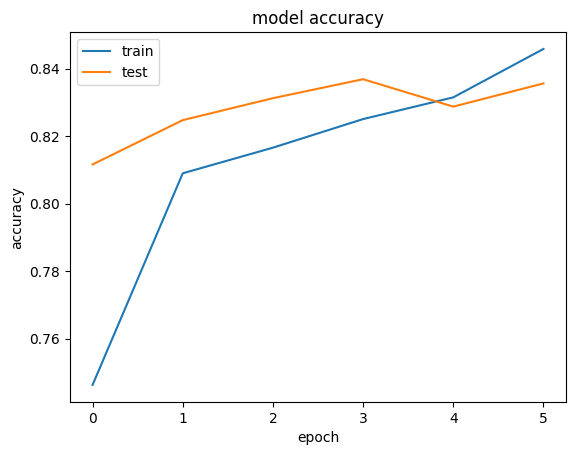

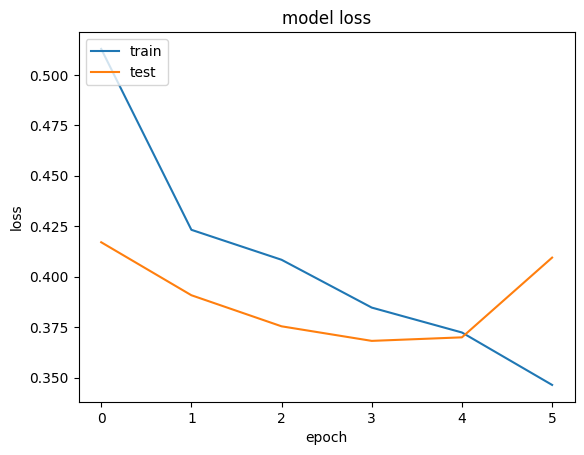

In [242]:
plot(lstm_history)

In [243]:
evaluate(lstm_model)

Test Score: 0.41855043172836304
Test Accuracy: 0.8288000226020813


GRU MODEL

In [244]:
gru_model,gru_history=gru(embedding_matrix_w2v,300)

Epoch 1/6
250/250 [==============================] - 10s 16ms/step - loss: 0.5061 - accuracy: 0.7412 - val_loss: 0.3926 - val_accuracy: 0.8240
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3992 - accuracy: 0.8202 - val_loss: 0.3931 - val_accuracy: 0.8270
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3660 - accuracy: 0.8366 - val_loss: 0.3548 - val_accuracy: 0.8464
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3478 - accuracy: 0.8468 - val_loss: 0.3644 - val_accuracy: 0.8447
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3326 - accuracy: 0.8550 - val_loss: 0.3270 - val_accuracy: 0.8574
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3228 - accuracy: 0.8599 - val_loss: 0.3238 - val_accuracy: 0.8593


In [245]:
evaluate(gru_model)

Test Score: 0.32162711024284363
Test Accuracy: 0.8578000068664551


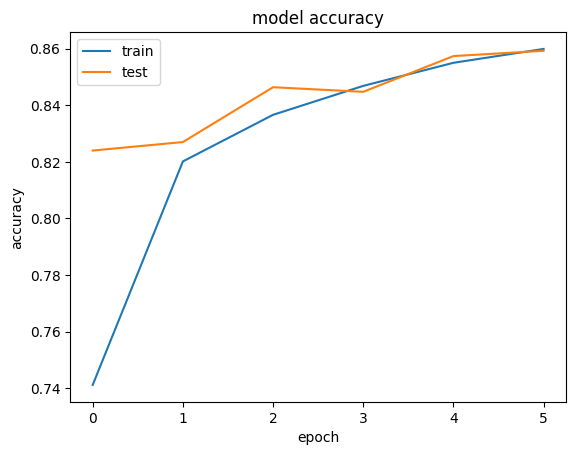

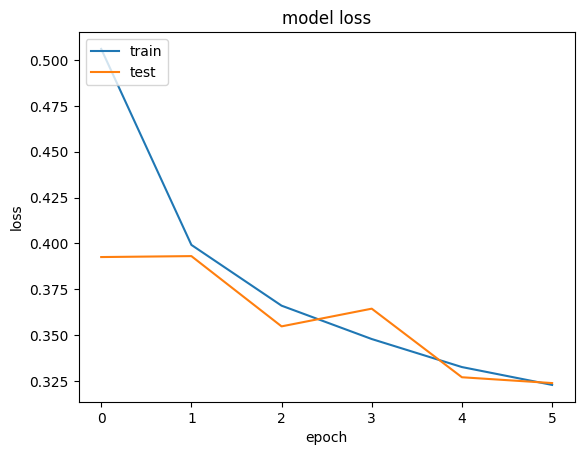

In [246]:
plot(gru_history)

CNN+LSTM MODEL

In [247]:
cnn_lstm_model,cnn_lstm_history=cnn_lstm(embedding_matrix_w2v,300)

Epoch 1/6
250/250 [==============================] - 12s 17ms/step - loss: 0.4700 - accuracy: 0.7697 - val_loss: 0.3692 - val_accuracy: 0.8324
Epoch 2/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3469 - accuracy: 0.8477 - val_loss: 0.3271 - val_accuracy: 0.8591
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2996 - accuracy: 0.8739 - val_loss: 0.3102 - val_accuracy: 0.8662
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2675 - accuracy: 0.8896 - val_loss: 0.3143 - val_accuracy: 0.8660
Epoch 5/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2101 - accuracy: 0.9184 - val_loss: 0.3253 - val_accuracy: 0.8639
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.1582 - accuracy: 0.9421 - val_loss: 0.3390 - val_accuracy: 0.8674


In [248]:
evaluate(cnn_lstm_model)

Test Score: 0.3355460464954376
Test Accuracy: 0.8677999973297119


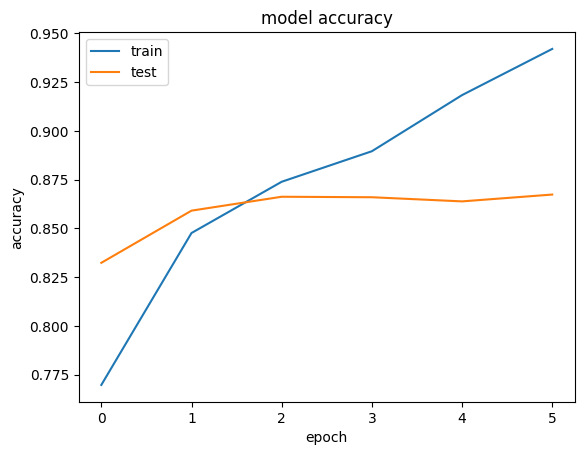

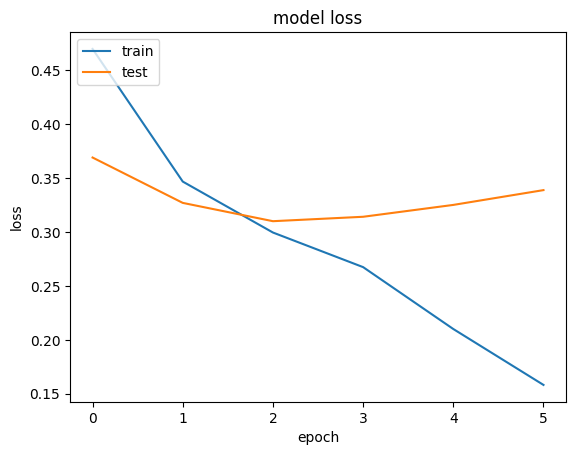

In [249]:
plot(cnn_lstm_history)

#TFIDF EMBEDDING#

The idea is to split X (text) and y and the apply the tfidf with `max_featues=600` to have and input sentence of (1 , 600) shape

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2,shuffle=True)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

40000 10000 50000


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

# Prepare the data
vectorizer = TfidfVectorizer(max_features =600)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_test)




In [11]:
X_train_tfidf[0].shape

(1, 600)

LSTM MODEL

In [12]:
from keras.layers import Reshape
lstm_model = Sequential()
lstm_model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
lstm_model.add(Reshape((64, 1)))

lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile your model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train your model
lstm_history = lstm_model.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))


Epoch 1/6
1250/1250 [==============================] - 22s 10ms/step - loss: 0.4074 - accuracy: 0.8104 - val_loss: 0.3513 - val_accuracy: 0.8459
Epoch 2/6
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3431 - accuracy: 0.8499 - val_loss: 0.3322 - val_accuracy: 0.8535
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3362 - accuracy: 0.8515 - val_loss: 0.3313 - val_accuracy: 0.8556
Epoch 4/6
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3273 - accuracy: 0.8549 - val_loss: 0.3341 - val_accuracy: 0.8523
Epoch 5/6
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3173 - accuracy: 0.8575 - val_loss: 0.3361 - val_accuracy: 0.8516
Epoch 6/6
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2976 - accuracy: 0.8701 - val_loss: 0.3436 - val_accuracy: 0.8531


In [13]:
score = lstm_model.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Validation loss: 0.3436242341995239
Validation accuracy: 0.8531000018119812


In [21]:
import matplotlib.pyplot as plt


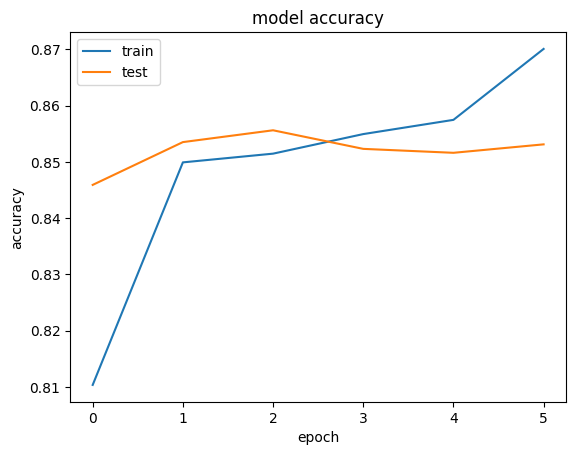

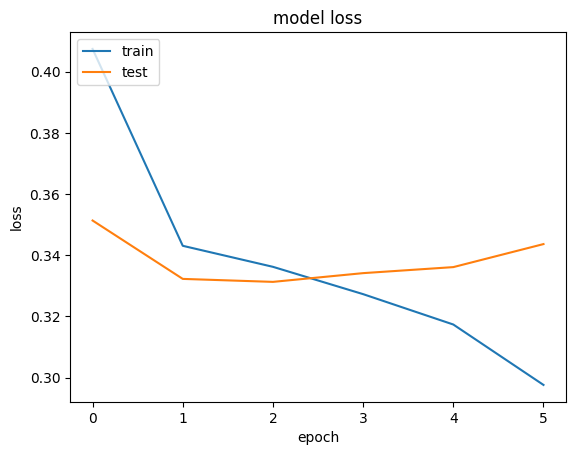

In [22]:
plot(lstm_history)

GRU MODEL

In [23]:
gru_model = Sequential()
gru_model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
gru_model.add(Reshape((64, 1)))  # Add an additional dimension

gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile your model
gru_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train your model
gru_histoy = gru_model.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))


Epoch 1/6
1250/1250 [==============================] - 12s 8ms/step - loss: 0.3981 - accuracy: 0.8138 - val_loss: 0.3384 - val_accuracy: 0.8532
Epoch 2/6
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3430 - accuracy: 0.8494 - val_loss: 0.3360 - val_accuracy: 0.8548
Epoch 3/6
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3365 - accuracy: 0.8522 - val_loss: 0.3359 - val_accuracy: 0.8541
Epoch 4/6
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3309 - accuracy: 0.8544 - val_loss: 0.3329 - val_accuracy: 0.8537
Epoch 5/6
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3225 - accuracy: 0.8587 - val_loss: 0.3329 - val_accuracy: 0.8549
Epoch 6/6
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3121 - accuracy: 0.8630 - val_loss: 0.3316 - val_accuracy: 0.8543


In [24]:
# Evaluate the model
score = gru_model.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.33162176609039307
Validation accuracy: 0.8543000221252441


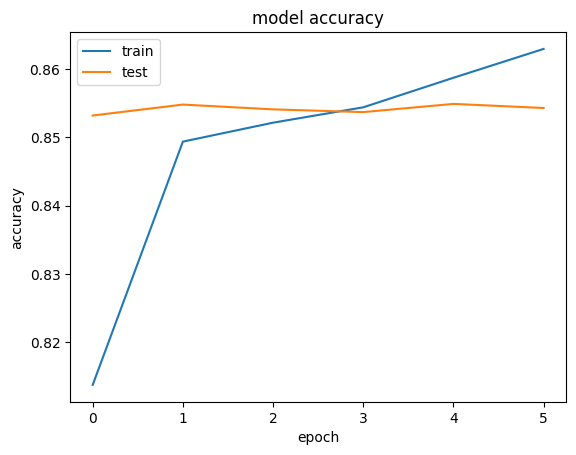

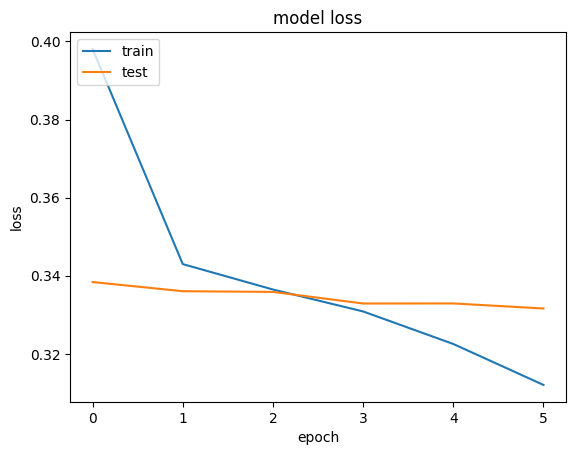

In [25]:
plot(gru_histoy)

CNN+LSTM MODEL

In [26]:
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
cnn_lstm_model.add(Reshape((64, 1)))  # Add an additional dimension
cnn_lstm_model.add(Conv1D(128,5,activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(128))
cnn_lstm_model.add(Dense(1,activation='sigmoid'))
cnn_lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_lstm_history=cnn_lstm_model.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))

Epoch 1/6
1250/1250 [==============================] - 12s 7ms/step - loss: 0.3905 - accuracy: 0.8220 - val_loss: 0.3731 - val_accuracy: 0.8276
Epoch 2/6
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3360 - accuracy: 0.8563 - val_loss: 0.3365 - val_accuracy: 0.8554
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3088 - accuracy: 0.8663 - val_loss: 0.3403 - val_accuracy: 0.8527
Epoch 4/6
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2761 - accuracy: 0.8838 - val_loss: 0.3523 - val_accuracy: 0.8449
Epoch 5/6
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2384 - accuracy: 0.9024 - val_loss: 0.3961 - val_accuracy: 0.8508
Epoch 6/6
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2063 - accuracy: 0.9189 - val_loss: 0.4500 - val_accuracy: 0.8241


In [27]:
# Evaluate the model
score = cnn_lstm_model.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.4499926269054413
Validation accuracy: 0.8241000175476074


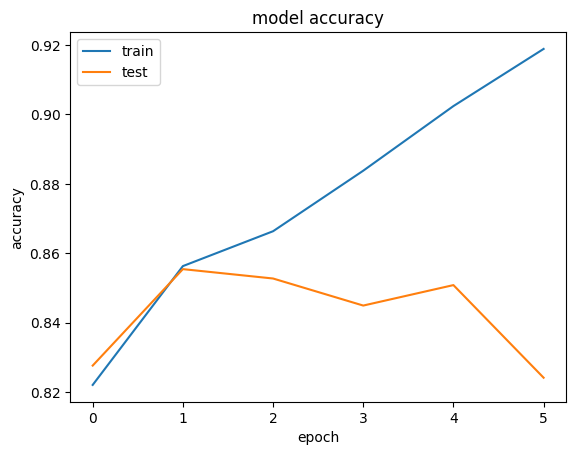

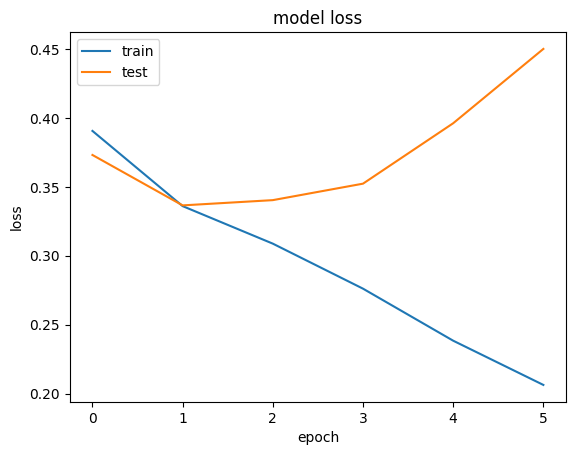

In [28]:
plot(cnn_lstm_history)

In [30]:
columns=['GLOVE','FAST_Text','WORD2VEC','TFIDF']
indexes=['LSTM','GRU','CNN+LSTM']

results=pd.DataFrame(index=indexes,columns=columns)

In [31]:
results['GLOVE']= [0.8571,	0.8611,	0.8341]
results['FAST_Text']= [0.859 , 0.868,	0.840]
results['WORD2VEC']= [0.828 ,0.857,  0.867]
results['TFIDF']= [ 0.853 , 0.854,0.824]

In [32]:
results.head()

,GLOVE,FAST_Text,WORD2VEC,TFIDF
LSTM,0.8571,0.859,0.828,0.853
GRU,0.8611,0.868,0.857,0.854
CNN+LSTM,0.8341,0.840,0.867,0.824


*2) On remarque que GRU est le meilleur modéle et ses valeurs de Loss montrent qu'il n'admet pas de overfitting.
Le CNN+LSTM a fait des surapprentissage sur quelques types de Embedding car on voit la courbe de loss se diminue puis les valeurs de loss augumentent.